```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

## AVOCADO PROJECT


```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

### Problem Statement:


    Avocado is a fruit consumed by people heavily in the United States
  
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Inspiration /Label 

    Task is to make a model by considering the data provided that can predict the Average Price.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv(r'C:\Users\91977\DataScienceProjects\Project_csv_files\avocado.csv')

In [44]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Dataset

    `Date` - The date of the observation
    
    `AveragePrice` - the average price of a single avocado
    
    `type` - conventional or organic
    
    `year` - the year
    
    `Region` - the city or region of the observation
    
    `Total Volume` - Total number of avocados sold
    
    `4046` - Total number of avocados with PLU 4046 sold
    
    `4225` - Total number of avocados with PLU 4225 sold
    
    `4770` - Total number of avocados with PLU 4770 sold

In [10]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
#Let's check the dataset dimension
data.shape

(18249, 14)

## Statistical Summary

Let's check whether we have null values in our dataset

In [12]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


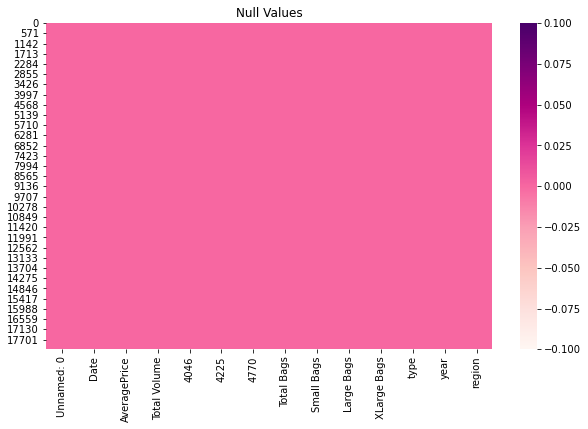

In [14]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [10,6])
sns.heatmap(data.isnull(),cmap ='RdPu')
plt.title('Null Values')
plt.show()

In [15]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [222]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#to check the correct data


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000
mean,1.40598,850644.01301,296894.00942,296141.16645,22839.73599,239639.20206,183782.11369,54338.08814,3106.42651,2016.14790,6.17722
std,0.40268,3453545.35540,1264532.99952,1203999.06649,107464.06844,986242.39922,745982.98876,243965.96455,17692.89465,0.93994,3.53413
min,0.44000,84.56000,1.00000,1.26000,0.00000,0.00000,2.52000,0.00000,0.00000,2015.00000,1.00000
25%,1.10000,10838.58000,975.09000,3086.95000,0.00000,5088.64000,3125.05000,127.47000,0.00000,2015.00000,3.00000
50%,1.37000,107376.76000,9954.77000,29773.64000,184.99000,39743.83000,27876.23000,2647.71000,0.00000,2016.00000,6.00000
75%,1.66000,432962.29000,121769.89000,154258.39000,6243.42000,110783.37000,86209.28000,22029.25000,132.50000,2017.00000,9.00000
max,3.25000,62505646.52000,22743616.17000,20470572.61000,2546439.11000,19373134.37000,13384586.80000,5719096.61000,551693.65000,2018.00000,12.00000


- We could see that column "year" min,25%,50% of data is '0', only the rest 75% of range has some values

In [16]:
pd.set_option('display.max_rows',None)  #so that all rows can be displayed

In [21]:
data['region'].value_counts()  #region data

GreatLakes             338
NewOrleansMobile       338
Portland               338
West                   338
Charlotte              338
MiamiFtLauderdale      338
CincinnatiDayton       338
Spokane                338
SouthCarolina          338
DallasFtWorth          338
Boston                 338
Plains                 338
RaleighGreensboro      338
NewYork                338
LasVegas               338
Jacksonville           338
Sacramento             338
Syracuse               338
PhoenixTucson          338
BuffaloRochester       338
SanFrancisco           338
HartfordSpringfield    338
Columbus               338
Seattle                338
Albany                 338
Midsouth               338
Northeast              338
GrandRapids            338
StLouis                338
California             338
SouthCentral           338
Boise                  338
Chicago                338
Roanoke                338
Denver                 338
Philadelphia           338
Indianapolis           338
H

In [22]:
data['year'].value_counts() #let's check year column

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

- The data is only for the particular years: 2015,2016,2017,2017
- we can apply encoding in this column

### EDA (EXPLORATORY DATA ANALYSIS)

### Univariate Analysis

<AxesSubplot:title={'center':'Average Price Distribution Plot'}, xlabel='AveragePrice', ylabel='Density'>

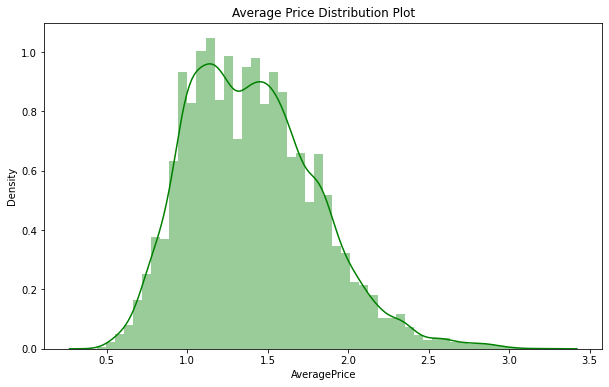

In [27]:
#Visualizing the Target variable

plt.figure(figsize=(10,6))

plt.title('Average Price Distribution Plot')
sns.distplot(data['AveragePrice'],color='Green')

- Average Price data is skewed towards right

- It means there were high fluctuations in price

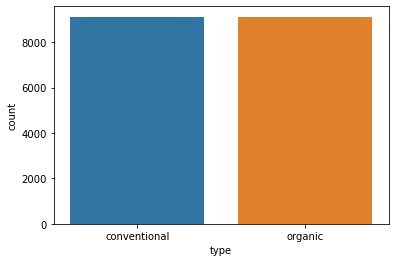

In [28]:
sns.countplot(x='type',data=data)
plt.show()

In [29]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

- We must say that we have almost equal number of Conventional and Organic Avocados sold
- Conventional Avocado sales are more than Organic Avocados by 3 in number

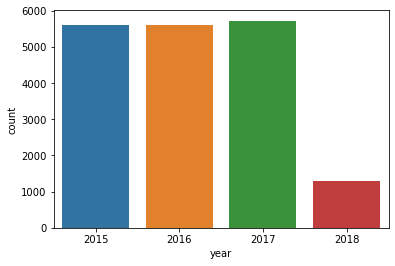

In [30]:
sns.countplot(x='year',data=data)
plt.show()

### Bivariate Analysis

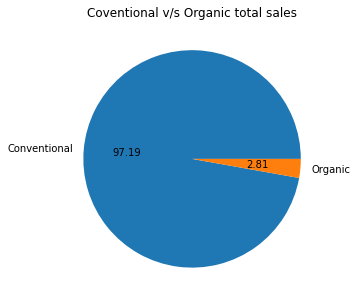

In [31]:
df1 = data.groupby(data['type']).sum()
plt.figure(figsize=(12,5))
plt.pie(df1['Total Volume'],data = df1, labels = ['Conventional','Organic'],autopct="%.2f")
plt.title('Coventional v/s Organic total sales')
plt.show()

Here, 
- 97.19% of Conventional type of Avocado were sold among the total volume of sales
    
- Rest, 2.81% of Organic Avocados were sold
    
#### Conculde: There was a high demand of Conventional Avocados between 2015-2018

<AxesSubplot:title={'center':'Total Avocados sold v/s year'}, xlabel='year', ylabel='Total Volume'>

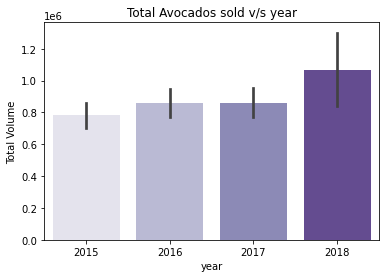

In [32]:
plt.title('Total Avocados sold v/s year')
sns.barplot(x = 'year',y = 'Total Volume',data = data,palette= 'Purples')

- Sales are trending in an increasing order since 2015

- We had more sales in 2018

In [33]:
#Check Year wise the number of avocado sold depending upon the type of Avocado

<AxesSubplot:xlabel='year', ylabel='count'>

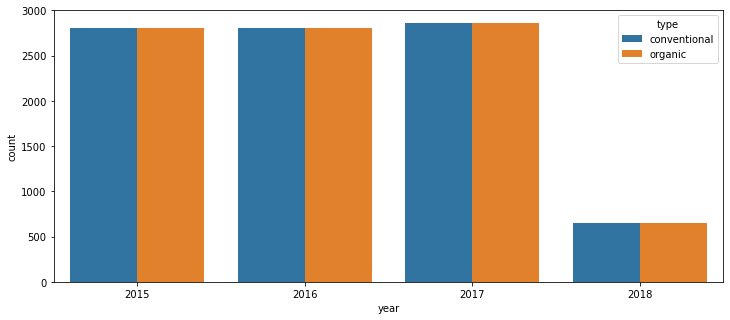

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='type', data= data)

##### Observation:
- We could see that both the type 'Conventional' and 'Organic' were sold equally and had equal demand between 2015-2018
- Here, there is an increasing trend od sales from 2015 to 2017 and then, a huge fall

    `2017` - had highest demand and sales
    
    `2018` - With a drastic drop, it had lowest demand sales

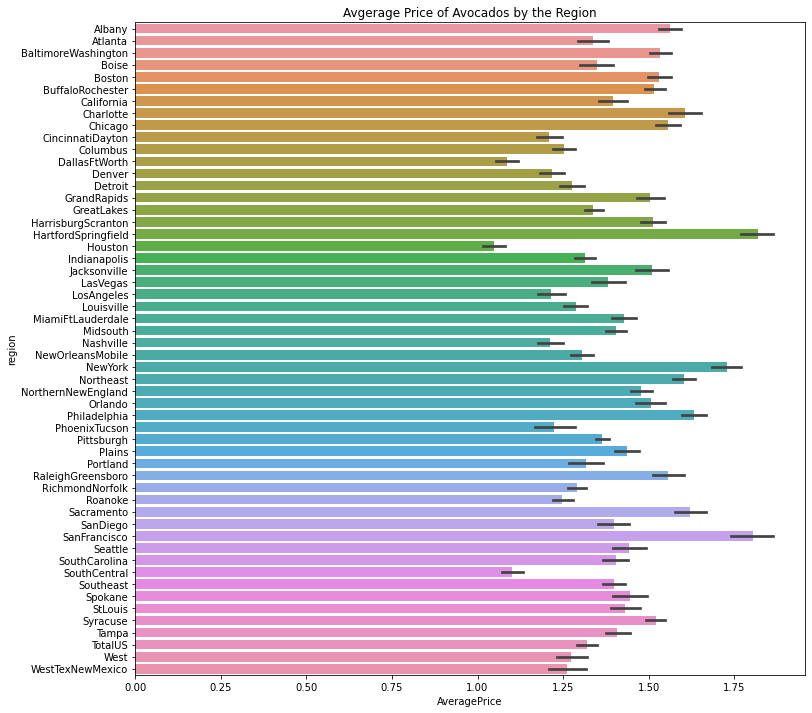

In [35]:
plt.figure(figsize=(12,12))
plt.title("Avgerage Price of Avocados by the Region")
sns.barplot(x="AveragePrice",y="region",data=data)
plt.show()

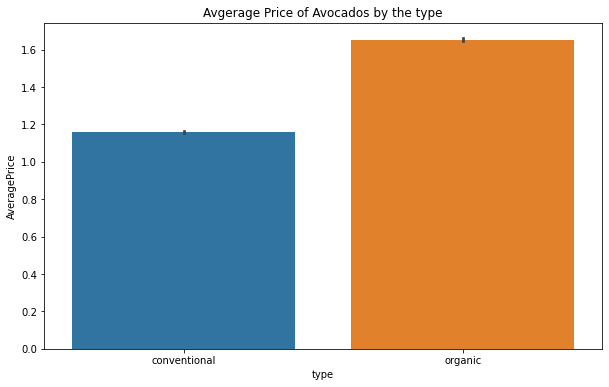

In [36]:
plt.figure(figsize=(10,6))
plt.title("Avgerage Price of Avocados by the type")
sns.barplot(x="type",y="AveragePrice",data=data)
plt.show()

- Average Price is high for Organic Avocados between 2015-2018

### Multivariate Analysis

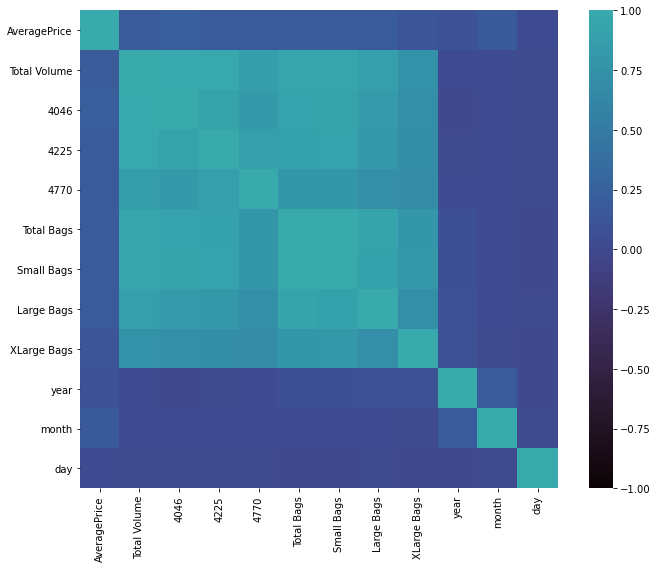

In [37]:
df2 = data.drop(columns=['type','region'])

df2_corr = df2.corr().abs() #to get the correlation values

plt.figure(figsize=(10,8))
sns.heatmap(df2_corr,vmin=-1,vmax=1,annot=False,square=True,center=0.5,fmt='.01g',linecolor='Black',cmap='mako')

plt.tight_layout()

In [ ]:
data.corr()

In [19]:
df = data.copy()

In [20]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day


- The year mentioned in the Date column must be same as the year mentioned in the year column
- Hence, not extracting the year from column Date as we already have them

In [21]:
#Let's drop column 'Date' 
#Let's remove 'Unnamed: 0' column as it shows an index range

df = df.drop(columns = ['Date','Unnamed: 0'])

### Outliers

Let's check for Outliers

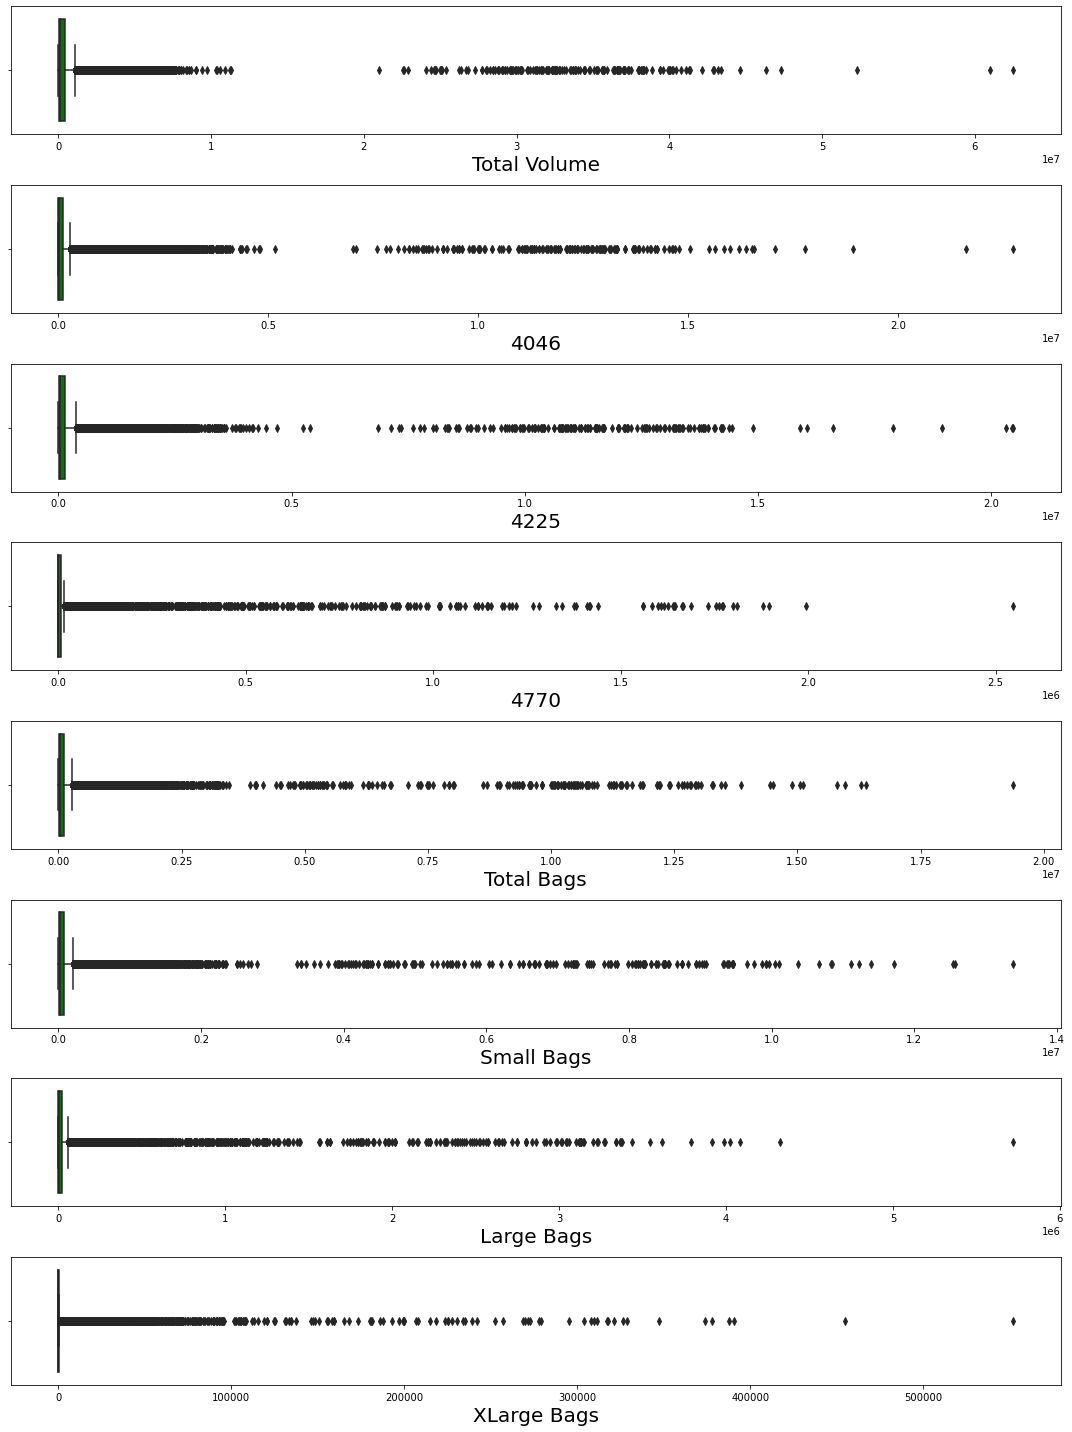

In [38]:
plt.figure(figsize = (15,20))
plotnumber = 1

for column in data.iloc[:,1:9]: #let's visualize only the features columns 
    if plotnumber<=8:
        ax = plt.subplot(8,1,plotnumber)
        sns.boxplot(data[column],color = 'Green')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

- We notice that there are lagre number of outliers
- And we would need to remove them later

### Removing Outlier's and Skewness

In [22]:
from scipy import stats
def outliers(df):
    for col in df.columns:
        if((df[col].dtype == 'float64') | (df[col].dtype == 'float64')):
            percentile = df[col].quantile([0.25, 0.75]).values
            Q1 = percentile[0]
            Q3 = percentile[1]
            IQR = stats.iqr(df[col], interpolation='midpoint')
            up_lim = Q3+1.5*IQR
            low_lim = Q1-1.5*IQR
            df[col] = np.where(df[col] < low_lim, Q1, df[col])
            df[col] = np.where(df[col] > up_lim, Q3, df[col])
        else:
            df[col] = df[col]
    return df

df_new = outliers(df)

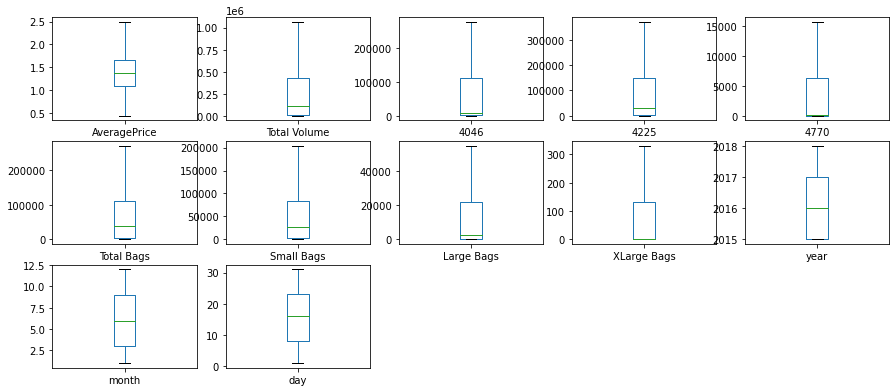

In [23]:
df_new.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

In [24]:
df_new.skew()

AveragePrice    0.318107
Total Volume    1.218168
4046            1.243002
4225            1.336790
4770            1.508574
Total Bags      1.025640
Small Bags      1.013666
Large Bags      1.377942
XLarge Bags     1.430140
year            0.215339
month           0.106617
day             0.014310
dtype: float64

In [25]:
for index in df_new.skew().index:
    if df_new.skew().loc[index]>0.55:
        df_new[index] = np.sqrt(df_new[index])

In [26]:
df_new.skew()

AveragePrice    0.318107
Total Volume    0.422142
4046            0.560666
4225            0.500860
4770            0.753816
Total Bags      0.209672
Small Bags      0.200212
Large Bags      0.545137
XLarge Bags     0.987027
year            0.215339
month           0.106617
day             0.014310
dtype: float64

In [27]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
df_new['type'] = l_enc.fit_transform(df_new['type'])
df_new['year'] = l_enc.fit_transform(df_new['year'])

In [28]:
region = pd.get_dummies(df_new.region)
df_new = pd.concat([df_new, region], axis='columns')
df_new.drop('region', axis=1, inplace=True)

In [29]:
X = df_new.drop(columns = 'AveragePrice')
Y = df_new['AveragePrice']

In [31]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

In [32]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.6515681889371472  with Random State  50


In [33]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = maxRS)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

R2: 0.6515681889371472
MAE: 0.17579623230165603
MSE: 0.05145335125284055
RMSE: 0.2268333116031253
Cross validation Score:  0.2967925496727962


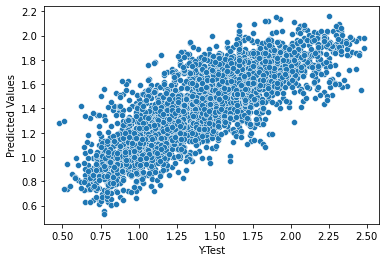

In [35]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R2: {}'.format(r2_score(y_test, predlr)))
print('MAE: {}'.format(mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, predlr))))
print('Cross validation Score: ', cross_val_score(lr,X_scaled,Y,cv=5).mean())

R Squared (R2): 0.6515681889371472
Mean Absolute Error (MAE): 0.17579623230165603
Mean Squared Error (MSE): 0.05145335125284055
Root Mean Squared Error (RMSE): 0.2268333116031253
Cross validation Score:  0.3925424467566148


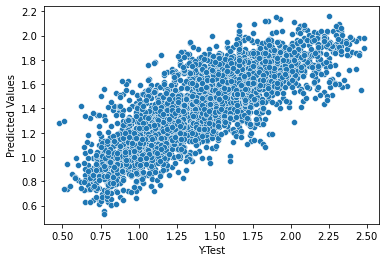

In [36]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=lr.predict(x_test)
sns.scatterplot(y_test,predgb)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predgb)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predgb)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predgb)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predgb))))
print('Cross validation Score: ', cross_val_score(gb,X_scaled,Y,cv=5).mean())

R Squared (R2): 0.6515681889371472
Mean Absolute Error (MAE): 0.17579623230165603
Mean Squared Error (MSE): 0.05145335125284055
Root Mean Squared Error (RMSE): 0.2268333116031253
Cross validation Score:  0.08828371479425119


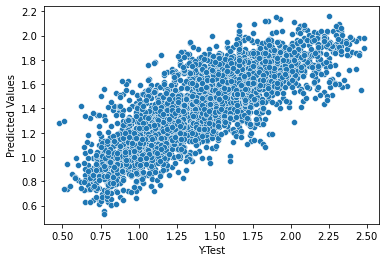

In [37]:

adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
predadb=lr.predict(x_test)
sns.scatterplot(y_test,predadb)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predadb)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predadb)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predadb)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predadb))))
print('Cross validation Score: ', cross_val_score(adb,X_scaled,Y,cv=5).mean())

R Squared (R2): 0.6515681889371472
Mean Absolute Error (MAE): 0.17579623230165603
Mean Squared Error (MSE): 0.05145335125284055
Root Mean Squared Error (RMSE): 0.2268333116031253
Cross validation Score:  0.2807595460823749


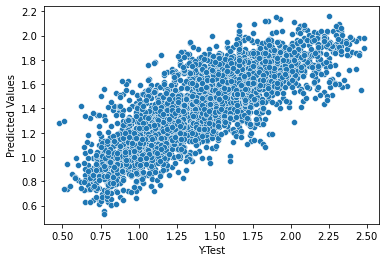

In [38]:

rand=RandomForestRegressor()
rand.fit(x_train,y_train)
predrand=lr.predict(x_test)
sns.scatterplot(y_test,predrand)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predrand)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predrand)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predrand)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predrand))))
print('Cross validation Score: ', cross_val_score(rand,X_scaled,Y,cv=5).mean())

R Squared (R2): 0.6515681889371472
Mean Absolute Error (MAE): 0.17579623230165603
Mean Squared Error (MSE): 0.05145335125284055
Root Mean Squared Error (RMSE): 0.2268333116031253
Cross validation Score:  0.2966344677881177


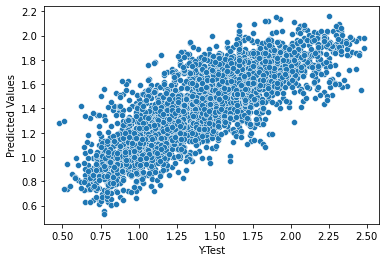

In [39]:

rdg=Ridge()
rdg.fit(x_train,y_train)
predrdg=lr.predict(x_test)
sns.scatterplot(y_test,predrdg)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predrdg)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predrdg)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predrdg)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predrdg))))
print('Cross validation Score: ', cross_val_score(rdg,X_scaled,Y,cv=5).mean())

R Squared (R2): 0.6515681889371472
Mean Absolute Error (MAE): 0.17579623230165603
Mean Squared Error (MSE): 0.05145335125284055
Root Mean Squared Error (RMSE): 0.2268333116031253
Cross validation Score:  0.30059243685406917


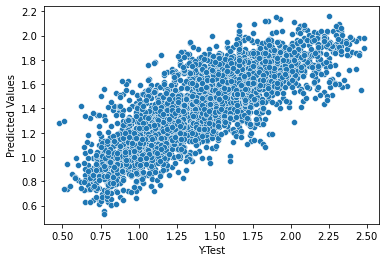

In [44]:

hb=HuberRegressor()
hb.fit(x_train,y_train)
predhb=lr.predict(x_test)
sns.scatterplot(y_test,predhb)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predhb)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predhb)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predhb)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predhb))))
print('Cross validation Score: ', cross_val_score(hb,X_scaled,Y,cv=5).mean())

R Squared (R2): 0.6515681889371472
Mean Absolute Error (MAE): 0.17579623230165603
Mean Squared Error (MSE): 0.05145335125284055
Root Mean Squared Error (RMSE): 0.2268333116031253
Cross validation Score:  0.2982807999925322


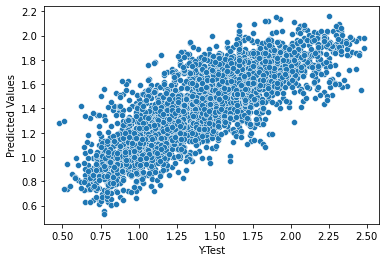

In [46]:
by=BayesianRidge()
by.fit(x_train,y_train)
predby=lr.predict(x_test)
sns.scatterplot(y_test,predby)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predby)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predby)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predby)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predby))))
print('Cross validation Score: ', cross_val_score(by,X_scaled,Y,cv=5).mean())

Let's check the overall scores

In [47]:
#R2 score of all the models
R1 = r2_score(y_test, predlr)
R2 = r2_score(y_test, predgb)
R3 = r2_score(y_test, predadb)
R4 = r2_score(y_test, predrand)
R5 = r2_score(y_test, predrdg)
R6 = r2_score(y_test, predhb)
R7 = r2_score(y_test, predby)


#Cross Validation Score of all the models
C1 = cross_val_score(lr,X_scaled,Y,cv=5).mean()
C2 = cross_val_score(gb,X_scaled,Y,cv=5).mean()
C3 = cross_val_score(adb,X_scaled,Y,cv=5).mean()
C4 = cross_val_score(rand,X_scaled,Y,cv=5).mean()
C5 = cross_val_score(rdg,X_scaled,Y,cv=5).mean()
C6 = cross_val_score(hb,X_scaled,Y,cv=5).mean()
C7 = cross_val_score(by,X_scaled,Y,cv=5).mean()


In [48]:

Overall_Score = pd.DataFrame({'Model':['Linear Regression','Gradient Boosting Regressor','AdaBoostRegressor','Random Forest Regressor','Ridge','HuberRegressor','BayesianRidge'],'R2_Score':[R1,R2,R3,R4,R5,R6,R7],'Cross_Validation_Score':[C1,C2,C3,C4,C5,C6,C7]})
Overall_Score['Difference'] = Overall_Score['R2_Score'] - Overall_Score['Cross_Validation_Score']

In [49]:
Overall_Score

,Model,R2_Score,Cross_Validation_Score,Difference
0,Linear Regression,0.651568,0.296793,0.354776
1,Gradient Boosting Regressor,0.651568,0.392708,0.258860
2,AdaBoostRegressor,0.651568,0.080186,0.571382
3,Random Forest Regressor,0.651568,0.278876,0.372692
4,Ridge,0.651568,0.296634,0.354934
5,HuberRegressor,0.651568,0.300592,0.350976
6,BayesianRidge,0.651568,0.298281,0.353287


In [50]:
Overall_Score['Difference'].min()

0.2588598726872301

In [52]:
Overall_Score[Overall_Score['Difference'] == 0.2588598726872301]

,Model,R2_Score,Cross_Validation_Score,Difference
1,Gradient Boosting Regressor,0.651568,0.392708,0.25886


###### Hence,Gradient Boosting Regressor is our best model

,y_test,Pred
6039,1.21,1.239751
4607,1.17,1.111649
16117,1.61,1.581891
11391,2.01,1.656701
9152,2.02,1.661504


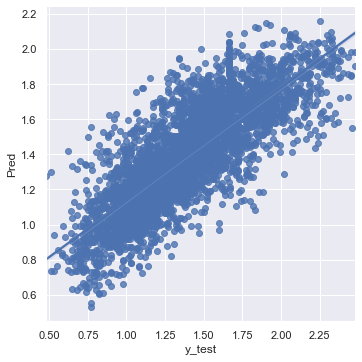

In [56]:
sns.set(font_scale = 1)
data = pd.DataFrame({'y_test':y_test , 'Pred':predgb},columns=['y_test','Pred'])
sns.lmplot(x='y_test',y='Pred',data=data,palette='rainbow')
data.head()

## Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'n_estimators':[10.50,100],'random_state':range(1,10),
              'min_samples_split':[1,3,4],'max_depth':[2,3],'max_features':['auto', 'sqrt', 'log2'],'min_samples_leaf':[1,2,3],
             'learning_rate':[0.01,0.1]}

gridsearch=GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_grid,scoring='r2',cv=5)     

gridsearch.fit(x_train,y_train)
print(gridsearch.best_score_, gridsearch.best_params_)

In [ ]:
GB_final = GradientBoostingRegressor(alpha = 0.03, n_estimators = True, max_iter = 10,copy_X=True,
                    random_state= 1)

GB_final.fit(x_train,y_train)

y_pred = GB_final.predict(x_test)

#### Before Tuning

In [ ]:
data_view1 = pd.DataFrame({'Actual':y_test , 'Predictions':predgb},columns=['Actual','Predictions'])
sns.lmplot(x='Actual',y='Predictions',data=data_view1,palette='rainbow')
data_view1

#### After Tuning

In [ ]:
data_view2 = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data_view2,palette='rainbow')
data_view2

### Performance Metrix:

In [ ]:
print('R Squared (R2): ',r2_score(y_test, y_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred))

## Saving the Model

In [ ]:

import joblib
joblib.dump(GB_final,'Avacodo_Price_Predictions.obj')

_______________